In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [24]:
data = pd.read_csv('Sales Data.csv')
data.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000


In [25]:
df = data.copy()
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000


In [26]:
df['discount_type'].fillna(0, inplace=True)
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,0.0,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,0.0,15000
4,5,5,11/10/2021,10000,1.0,16000


In [27]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29057 entries, 0 to 29056
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       29057 non-null  int64         
 1   user_id        29057 non-null  int64         
 2   created_at     29057 non-null  datetime64[ns]
 3   discount_cost  29057 non-null  int64         
 4   discount_type  29057 non-null  float64       
 5   basket         29057 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.3 MB


In [28]:
df = df[(df['created_at'] >= '2022-01-01')]
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket
5,6,6,2022-01-01,0,0.0,10000
6,7,7,2022-01-01,0,0.0,29500
7,8,8,2022-01-01,10000,1.0,10000
8,9,9,2022-01-01,0,0.0,5000
9,10,10,2022-01-01,0,0.0,35000


In [29]:
def get_month(x):
    return dt.datetime(x.year, x.month,1)

In [30]:
df['created_month'] = df['created_at'].apply(get_month)
df['cohort_month'] = df.groupby('user_id')['created_month'].transform('min')
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,created_month,cohort_month
5,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01-01
6,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-01-01
7,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-01-01
8,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01-01
9,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01-01


In [31]:
def get_date_elements(dframe, column):
    day = dframe[column].dt.day
    month = dframe[column].dt.month
    year = dframe[column].dt.year
    return year, month, day

In [32]:
created_year, created_month, _ = get_date_elements(df, 'created_month')
cohort_year, cohort_month, _ = get_date_elements(df, 'cohort_month')

In [33]:
year_diff = created_year - cohort_year
month_diff = created_month - cohort_month
df['CohortIndex'] = year_diff * 12 + month_diff + 1

In [34]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,created_month,cohort_month,CohortIndex
5,6,6,2022-01-01,0,0.0,10000,2022-01-01,2022-01-01,1
6,7,7,2022-01-01,0,0.0,29500,2022-01-01,2022-01-01,1
7,8,8,2022-01-01,10000,1.0,10000,2022-01-01,2022-01-01,1
8,9,9,2022-01-01,0,0.0,5000,2022-01-01,2022-01-01,1
9,10,10,2022-01-01,0,0.0,35000,2022-01-01,2022-01-01,1


In [35]:
cohort_data = df.groupby(['cohort_month', 'CohortIndex'])['user_id'].apply(pd.Series.nunique).reset_index()
cohort_data

,cohort_month,CohortIndex,user_id
0,2022-01-01,1,1492
1,2022-01-01,2,457
2,2022-01-01,3,365
3,2022-01-01,4,378
4,2022-01-01,5,316
5,2022-01-01,6,317
6,2022-01-01,7,324
7,2022-02-01,1,1539
8,2022-02-01,2,385
9,2022-02-01,3,393


In [36]:
cohort_table = cohort_data.pivot(index='cohort_month', columns=['CohortIndex'], values='user_id')
cohort_table

CohortIndex,1,2,3,4,5,6,7
cohort_month,,,,,,,
2022-01-01,1492.0,457.0,365.0,378.0,316.0,317.0,324.0
2022-02-01,1539.0,385.0,393.0,362.0,354.0,337.0,NaN
2022-03-01,1258.0,306.0,275.0,259.0,277.0,NaN,NaN
2022-04-01,1592.0,421.0,389.0,391.0,NaN,NaN,NaN
2022-05-01,1192.0,352.0,287.0,NaN,NaN,NaN,NaN
2022-06-01,1397.0,405.0,NaN,NaN,NaN,NaN,NaN
2022-07-01,1515.0,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cohort_table.index = cohort_table.index.strftime('%B %Y')

In [38]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:, 0], axis=0)
new_cohort_table.round(3) * 100
new_cohort_table

CohortIndex,1,2,3,4,5,6,7
cohort_month,,,,,,,
January 2022,1.0,0.306300,0.244638,0.253351,0.211796,0.212466,0.217158
February 2022,1.0,0.250162,0.255361,0.235218,0.230019,0.218973,NaN
March 2022,1.0,0.243243,0.218601,0.205882,0.220191,NaN,NaN
April 2022,1.0,0.264447,0.244347,0.245603,NaN,NaN,NaN
May 2022,1.0,0.295302,0.240772,NaN,NaN,NaN,NaN
June 2022,1.0,0.289907,NaN,NaN,NaN,NaN,NaN
July 2022,1.0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Cohort Analysis'}, xlabel='CohortIndex', ylabel='cohort_month'>

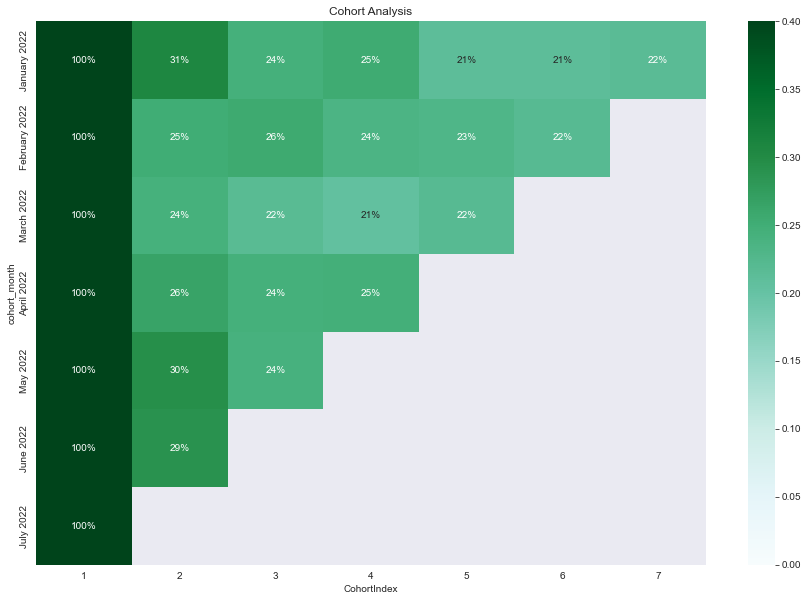

In [39]:
plt.figure(figsize=(15, 10))
plt.title('Cohort Analysis')
sns.heatmap(data=new_cohort_table, annot=True, vmin=0, vmax=0.4, cmap='BuGn', fmt='.0%')

In [40]:
resample_df = df.resample("1M", on="created_at").size()
resample_df[(resample_df.index.year == 2022) & (resample_df.index.month == 7)]

created_at
2022-07-31    6395
Freq: M, dtype: int64

In [41]:
print(round(new_cohort_table[2].mean() * 100, 2))
round(new_cohort_table[2].mean() * (resample_df[(resample_df.index.year == 2022) & (resample_df.index.month == 7)])[0])

27.49


1758